In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Executive summary

The experiment descibed in this document compares 2 different algorithms for solving the 3-SAT problem. These algorithms are `prob_sat` and `gsat` and they are from the group of non-complete algorithms.



# Introduction

The experiment is trying to answer if `prob_sat` is faster than `gsat` given 3-SAT instances that are hard (have the clauses-to-variables ration near `4.3`). These instances were downloaded from the `SATLIB` benchmarks. Parameters used to answer the experiment were as follows.

* `MAX_TRIES` - $400$
* `MAX_FLIPS`  - $30$
* `gsat` $p = 0.4$
* `prob_sat` $c_m = 0, c_b = 2.3$



# Material

`GSAT` implementation given on the lectures was used to generate solutions to instances. `Prob_sat` implementation was written in python from scratch using the same API. Both implementations ran instances from the `uf20-91R` dataset, each one for 1000 times, so that it is possible to average anomalies. Results were then saved as csv and sample from that csv could be seen bellow and full data is available as an attachment.

There were no unsolved runs, so penalization was not used before averaging the values.

In [23]:
df = pd.read_csv("res.csv", delimiter=" ", names=["iter", "iter_max", "sat_clause", "all_clause", "filename", "alg"])
df["filename"] = df["filename"].str.removeprefix("uf20-91R/")
df = df.drop("iter_max", axis=1)
#df["solved"] = False
#df["solved"] = df["all_clause"] == df["sat_clause"]

df

,iter,sat_clause,all_clause,filename,alg
0,14,91,91,uf20-011.cnf,prob_sat
1,131,91,91,uf20-011.cnf,gsat
2,73,91,91,uf20-011.cnf,prob_sat
3,21,91,91,uf20-011.cnf,gsat
4,50,91,91,uf20-011.cnf,prob_sat
...,...,...,...,...,...
199795,16,91,91,uf20-0990.cnf,gsat
199796,139,91,91,uf20-0990.cnf,prob_sat
199797,299,91,91,uf20-0990.cnf,gsat
199798,263,91,91,uf20-0990.cnf,prob_sat


Data acquired from the gathering step were then averaged accross filename and algorithm columns. Resulting dataset has only 200 rows total.

In [24]:
avgs = df.groupby(["filename", "alg"]).mean().reset_index()
avgs


,filename,alg,iter,sat_clause,all_clause
0,uf20-011.cnf,gsat,32.252252,91.0,91.0
1,uf20-011.cnf,prob_sat,29.473473,91.0,91.0
2,uf20-0110.cnf,gsat,21.634635,91.0,91.0
3,uf20-0110.cnf,prob_sat,20.593594,91.0,91.0
4,uf20-0116.cnf,gsat,87.546547,91.0,91.0
...,...,...,...,...,...
195,uf20-0969.cnf,prob_sat,78.904905,91.0,91.0
196,uf20-0987.cnf,gsat,56.885886,91.0,91.0
197,uf20-0987.cnf,prob_sat,50.698699,91.0,91.0
198,uf20-0990.cnf,gsat,106.395395,91.0,91.0


As the metric, the `cdf` (cummulative distributive function) over the number of iterations has been chosen. Other metrics were not conclusive, because the difference between `gsat` and `prob_sat` for these parameters is not that significant.

# Results

Data is available in the `res.csv` file and bellow we can see the `cdf` graph with zoomed in version of the same graph on the right. It shows us the probability (`y` axis) of finding the solution given number of iteration (`x` axis).

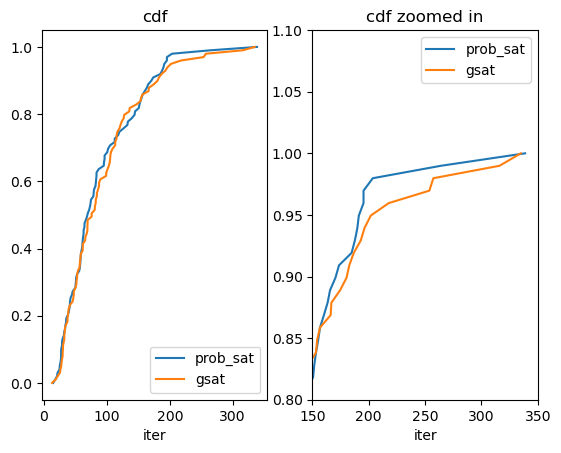

In [25]:
def cdf(df: pd.DataFrame, alg: str):
    data = np.sort(df[df.alg == alg]["iter"])
    y = 1. * np.arange(len(data)) / (len(data) - 1)
    return data, y

def plot_cdf(xlim = None, ylim = None):
    ps_data, y = cdf(avgs, "prob_sat")
    plt.plot(ps_data, y, )
    plt.xlabel("iter")
    g_data, y = cdf(avgs, "gsat")
    plt.plot(g_data, y, )
    plt.xlabel("iter")
    plt.legend(["prob_sat", "gsat"])

    if xlim is not None:
        plt.xlim(xlim[0], xlim[1])
    if ylim is not None:
        plt.ylim(ylim[0], ylim[1])

plt.subplot(1, 2, 1)
plt.title("cdf")
plot_cdf()
plt.subplot(1, 2, 2)
plt.title("cdf zoomed in")
plot_cdf((150, 350), (0.8, 1.1))
plt.show()


# Discussion

There is not a systematically better algorithm, which is apparent from the intersections in the first graph. For higher iterations it seems like `prob_sat` is better, if we ignore the last point in the `cdf`, which seems to favor `gsat`.

But we cannot ignore that, because it is possible that after the 350th iteration number the `gsat` algorithm would be superior. Further measurements are needed maybe using harder instances.